In [42]:
%matplotlib notebook

In [43]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Make sure the pyodine package can be found.
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Reimport the package on every evaluation of this cell
import importlib
import pyodine.controller.feature_locator
pyodine.controller.feature_locator = importlib.reload(pyodine.controller.feature_locator)

In [44]:
loc = pyodine.controller.feature_locator.FeatureLocator()
ref = np.fromfile('../../data/Analytic Spectrum (KD)_100kHz.bin')
loc.reference, loc.ref_span = ref, 1000  # approx. 1000 MHz of reference span

In [45]:
for r in np.nditer(loc.reference, op_flags=['readwrite']):
    if abs(r) < 0.01:
        r[...] = 0

# Emulate low-frequency sampling of one feature.
sample = loc.reference[3950:4950]
low_res_sample = sample[::5]

# Add noise.
loc.reference = np.add(loc.reference, np.random.normal(0, .1, len(loc.reference)))
sample = np.add(sample, np.random.normal(0, .1, len(sample)))

In [46]:
loc.locate_sample(np.array([range(len(low_res_sample)), low_res_sample]), 16.64 * 5)  # Sample spans approx. 16.7 MHz.

[[329.13923839680024, 0.97855533108121562, 0.58134078677951884],
 [307.89100908257643, 0.73204695460771596, 0.43489493034694843],
 [567.8693442213148, 0.72420622093736808, 0.43023690219455735],
 [91.242396466961083, 0.72364111585397495, 0.42990118419951057],
 [470.37746854428798, 0.72317185882607138, 0.42962240767953408],
 [806.18281809849179, 0.71897761473321375, 0.42713068842417717],
 [350.30414132155653, 0.65594777265498405, 0.38968587889678852],
 [457.87851012415632, 0.52935251263228533, 0.31447808458347404],
 [546.53778851762354, 0.5189790126756556, 0.30831538899038857],
 [784.85126239480041, 0.51636091649784999, 0.30676002871230573],
 [696.10865761186574, 0.50699952120301373, 0.30119860491418377],
 [69.910840763269732, 0.50252515181869262, 0.29854046864369876],
 [701.19156736938589, 0.49904463514991032, 0.29647276104008935],
 [425.38121823181405, 0.3781574574382251, 0.22465602797419598],
 [438.71344054662109, 0.37317834327077787, 0.22169803259505824],
 [449.04591284059666, 0.3713

<IPython.core.display.Javascript object>


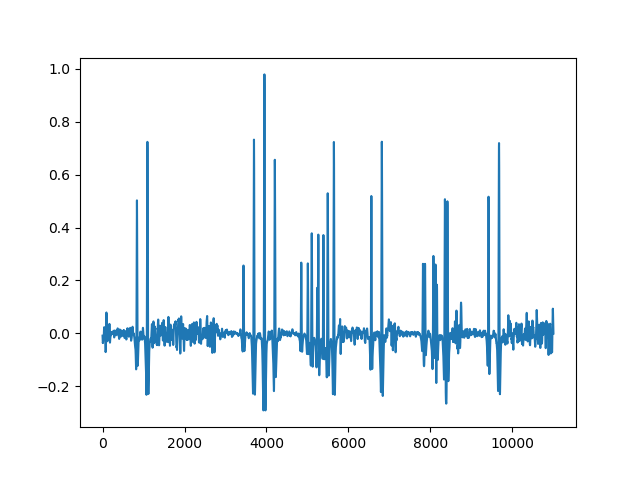

In [47]:
plt.plot(loc.correlate())